In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
plt.style.use('bmh')

In [3]:
#!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
# Loading Data
data_train = np.load('data_train.npy')
labels_train = np.load('labels_train.npy')

labels_names =['Stadium','Building','Traffic Sign','Forest','Flowers',
              'Street','Classroom','Bridge','Statue','Lake']

print(data_train.shape, labels_train.shape)

(270000, 3124) (3124,)


In [6]:
#! pip install  opencv-python
import cv2

In [7]:
ll = 5 # class
bins = 64 # bins for the histogram
print('Class ',labels_names[ll-1])

# Parameters for plotting
kk=[0,3,6]
channels=['Red','Green','Blue']
cc=['r','g','b']

# Permutes the index locations for class ll
rnd_sample = npr.permutation(np.where(labels_train==ll)[0])

# Plot the histogram for the first 10 images
# for i in range(10):
#     image = data_train[:,rnd_sample[i]].reshape((300,300,3))
#     plt.figure(figsize=(15,5))
#     plt.subplot(1,2,1); plt.imshow(image); plt.axis('off')
#     plt.subplot(1,2,2)
#     for j in range(3):
#         channel = image[:,:,j]
#         hist = cv2.calcHist([channel], [0], None, [bins], [0, 256])
#         plt.plot(hist,label=channels[j],c=cc[j]); plt.xlim([0, bins])
#         plt.ylabel('# of Pixels')
#     plt.xlabel('Bins');plt.legend();plt.show();

Class  Flowers


In [8]:
# Obtain the Histogram Features for all Samples
features = []
for i in range(data_train.shape[1]):
    image = data_train[:,i].reshape((300,300,3))
    f_hist=[]
    for j in range(3):
        channel = image[:,:,j]
        hist = cv2.calcHist([channel], [0], None, [32], [0, 256])
        if j ==0:
            f_hist=hist
        else:
            f_hist=np.vstack((f_hist,hist))
    if i==0:
        features = f_hist
    else:
        features = np.hstack((features, f_hist))
features = features.T
print(features.shape)

print(data_train.shape)

(3124, 96)
(270000, 3124)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_train.transpose(), labels_train, test_size=0.20)

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [13]:
X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train = np.resize(X_train,(2499,300,300,3))
X_test = np.resize(X_test,(625,300,300,3))
y_train_new = y_train - 1
y_test_new = y_test - 1
print(y_train_new)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_new))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_new))

(2499, 300, 300, 3)
(625, 300, 300, 3)
(2499,)
(625,)
[7. 6. 0. ... 3. 8. 6.]


In [ ]:
# for image_batch, labels_batch in train_dataset:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

# AUTOTUNE = tf.data.AUTOTUNE

# train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# normalization_layer = layers.Rescaling(1./255)

# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))



In [14]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

In [15]:
num_classes = 10


model = Sequential([
  layers.Rescaling(1./255, input_shape=(300,300,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 75s 2s/step - loss: 2.5600 - accuracy: 0.1497 - val_loss: 1.9909 - val_accuracy: 0.2912
Epoch 2/10
40/40 [==============================] - 77s 2s/step - loss: 1.6638 - accuracy: 0.4454 - val_loss: 1.4799 - val_accuracy: 0.4816
Epoch 3/10
40/40 [==============================] - 80s 2s/step - loss: 1.2726 - accuracy: 0.5710 - val_loss: 1.6172 - val_accuracy: 0.4688
Epoch 4/10
40/40 [==============================] - 91s 2s/step - loss: 1.0672 - accuracy: 0.6591 - val_loss: 1.3493 - val_accuracy: 0.5440
Epoch 5/10
40/40 [==============================] - 93s 2s/step - loss: 0.7582 - accuracy: 0.7547 - val_loss: 1.3901 - val_accuracy: 0.5744
Epoch 6/10
40/40 [==============================] - 84s 2s/step - loss: 0.5358 - accuracy: 0.8431 - val_loss: 1.5282 - val_accuracy: 0.5712
Epoch 7/10
40/40 [==============================] - 77s 2s/step - loss: 0.3980 - accuracy: 0.8836 - val_loss: 1.8691 - val_accuracy: 0.5360
Epoch 8/10
40/40 [==

In [17]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(300,
                                  300,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

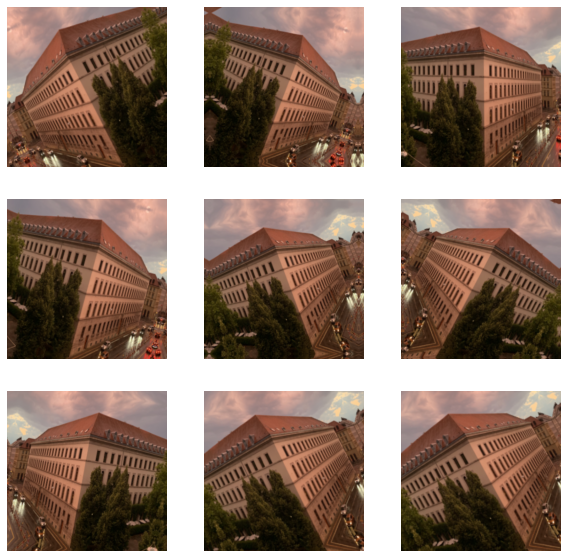

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(5):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [19]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
epochs=15
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/15
40/40 [==============================] - 88s 2s/step - loss: 2.5417 - accuracy: 0.1285 - val_loss: 2.1554 - val_accuracy: 0.2192
Epoch 2/15
40/40 [==============================] - 93s 2s/step - loss: 1.9345 - accuracy: 0.3225 - val_loss: 1.8363 - val_accuracy: 0.3856
Epoch 3/15
40/40 [==============================] - 99s 2s/step - loss: 1.6579 - accuracy: 0.4550 - val_loss: 1.5613 - val_accuracy: 0.4592
Epoch 4/15
40/40 [==============================] - 107s 3s/step - loss: 1.4333 - accuracy: 0.5178 - val_loss: 1.4485 - val_accuracy: 0.5200
Epoch 5/15
40/40 [==============================] - 109s 3s/step - loss: 1.3039 - accuracy: 0.5634 - val_loss: 1.4992 - val_accuracy: 0.4848
Epoch 6/15
40/40 [==============================] - 109s 3s/step - loss: 1.6611 - accuracy: 0.4462 - val_loss: 1.7195 - val_accuracy: 0.4272
Epoch 7/15
40/40 [==============================] - 95s 2s/step - loss: 1.4264 - accuracy: 0.5122 - val_loss: 1.6573 - val_accuracy: 0.4864
Epoch 8/15
40/40 

KeyboardInterrupt: 

AttributeError: 'BatchDataset' object has no attribute 'shape'